<a href="https://colab.research.google.com/github/shukurullo2004/Machine-learnings/blob/main/04foodstraining_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import requests
import pathlib
from pathlib import Path
import zipfile

In [2]:
data_path = Path("data")
image_path = data_path/"pizza_steak_sushi"
if image_path.is_dir():
  print(f"directory already exist....")
else:
  print(f"directory does not exist....")
  image_path.mkdir(parents=True, exist_ok=True)


with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("downoading data...")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print("unzipping file...")
  zip_ref.extractall(image_path)

directory does not exist....
downoading data...
unzipping file...


In [3]:
image_path

PosixPath('data/pizza_steak_sushi')

In [4]:
import os
def walk_through(dir_name):
  for dir_path, dirname, filename in os.walk(dir_name):
    print(f"there are {len(filename)} directories and {len(dirname)} images in {dir_path}")

In [5]:
walk_through(image_path)

there are 0 directories and 2 images in data/pizza_steak_sushi
there are 0 directories and 3 images in data/pizza_steak_sushi/test
there are 19 directories and 0 images in data/pizza_steak_sushi/test/steak
there are 25 directories and 0 images in data/pizza_steak_sushi/test/pizza
there are 31 directories and 0 images in data/pizza_steak_sushi/test/sushi
there are 0 directories and 3 images in data/pizza_steak_sushi/train
there are 75 directories and 0 images in data/pizza_steak_sushi/train/steak
there are 78 directories and 0 images in data/pizza_steak_sushi/train/pizza
there are 72 directories and 0 images in data/pizza_steak_sushi/train/sushi


In [6]:
#set up training and testing path
train_dir = image_path/'train'
test_dir = image_path/'test'
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Image path: data/pizza_steak_sushi/train/steak/256592.jpg
Image class: steak
image height: 384
Image weight: 512


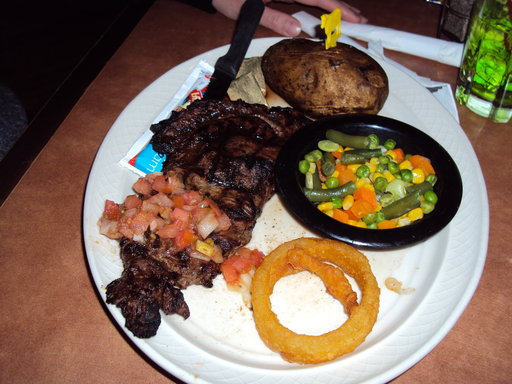

In [7]:
import random
import PIL
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"image height: {img.height}")
print(f"Image weight: {img.width}")

img

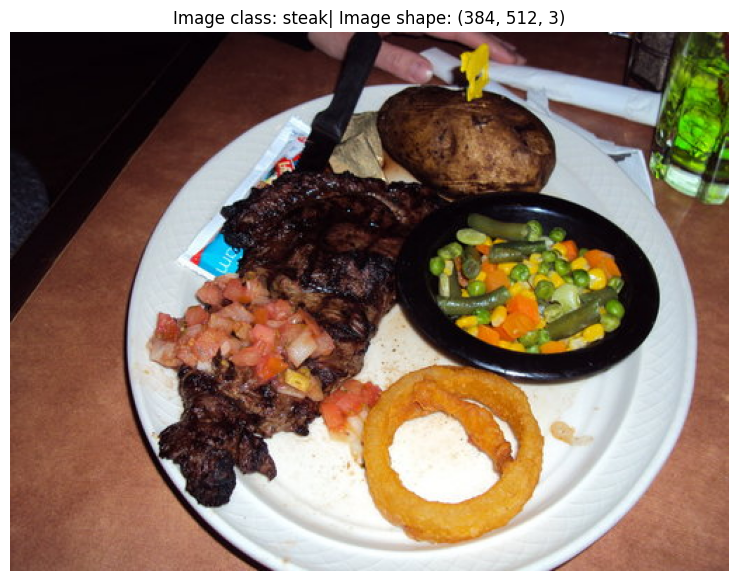

In [8]:
im_as_array = np.asarray(img)
plt.figure(figsize= (10,7))
plt.title(f"Image class: {image_class}| Image shape: {im_as_array.shape}")
plt.axis(False)
plt.imshow(im_as_array)

array([[[  8,   2,   6],
        [  8,   2,   6],
        [  8,   2,   6],
        ...,
        [ 55,  24,   4],
        [ 61,  28,   9],
        [100,  67,  48]],

       [[  8,   2,   6],
        [  8,   2,   6],
        [  8,   2,   6],
        ...,
        [ 50,  16,   4],
        [ 53,  18,  12],
        [ 80,  42,  39]],

       [[  8,   2,   6],
        [  8,   2,   6],
        [  8,   2,   6],
        ...,
        [ 52,  18,  16],
        [ 58,  18,  26],
        [ 59,  17,  31]],

       ...,

       [[105,  61,  48],
        [110,  66,  53],
        [116,  72,  59],
        ...,
        [137,  88,  74],
        [138,  89,  75],
        [138,  89,  75]],

       [[106,  62,  49],
        [111,  67,  54],
        [117,  73,  60],
        ...,
        [135,  86,  72],
        [136,  87,  73],
        [136,  87,  73]],

       [[107,  63,  50],
        [111,  67,  54],
        [116,  72,  59],
        ...,
        [135,  86,  72],
        [136,  87,  73],
        [136,  87,  73]]], dtype=uint8)
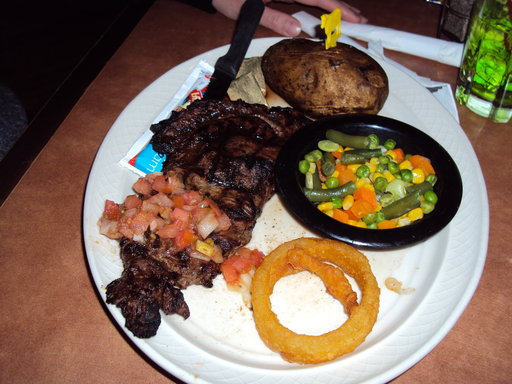

In [9]:
im_as_array

In [10]:
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [11]:
data_transform = transforms.Compose(
    [transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

In [12]:
data_transform(img)

tensor([[[0.0314, 0.0314, 0.0275,  ..., 0.1569, 0.2078, 0.2549],
         [0.0314, 0.0314, 0.0314,  ..., 0.1647, 0.1765, 0.2667],
         [0.0314, 0.0314, 0.0314,  ..., 0.1686, 0.2000, 0.2353],
         ...,
         [0.4627, 0.4745, 0.4863,  ..., 0.6157, 0.5882, 0.5843],
         [0.4667, 0.4706, 0.4863,  ..., 0.6078, 0.5922, 0.5725],
         [0.4549, 0.4784, 0.4980,  ..., 0.5843, 0.5529, 0.5451]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.1725, 0.2235, 0.1882],
         [0.0078, 0.0078, 0.0078,  ..., 0.1922, 0.1922, 0.2235],
         [0.0078, 0.0078, 0.0078,  ..., 0.2078, 0.2392, 0.2157],
         ...,
         [0.2745, 0.2824, 0.2863,  ..., 0.4039, 0.3804, 0.3765],
         [0.2824, 0.2784, 0.2941,  ..., 0.3961, 0.3882, 0.3686],
         [0.2784, 0.2902, 0.3137,  ..., 0.3686, 0.3529, 0.3451]],

        [[0.0235, 0.0235, 0.0235,  ..., 0.0824, 0.0980, 0.0980],
         [0.0235, 0.0235, 0.0235,  ..., 0.0745, 0.0784, 0.0980],
         [0.0235, 0.0235, 0.0235,  ..., 0.0627, 0.0784, 0.

In [13]:
from torchvision.datasets import ImageFolder

train_data = ImageFolder(root = train_dir,
                         transform = data_transform)
test_data = ImageFolder(root = test_dir,
                        transform =data_transform)
img, label = train_data[0][0], train_data[0][1]
label

0

In [14]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [15]:
import os
os.cpu_count()

2

In [16]:
train_data_loader = DataLoader(dataset = train_data,
                               batch_size = 32,
                               shuffle=True)
test_data_loader = DataLoader(test_data,
                              batch_size =32,
                              shuffle = False)

train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7ae75af77bb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ae75af77ac0>)

In [17]:
len(train_data_loader), len(test_data_loader)

(8, 3)

In [18]:
from torchvision import datasets, transforms

my_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [19]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform = my_transform,
                                  )

test_data = datasets.ImageFolder(root= test_dir,
                                 transform = my_transform,
                                 )

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [20]:
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=32,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             shuffle = False,
                             batch_size = 32)


In [21]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [22]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_shape: int,
               output_shape: int):
    super().__init__()
    self.Conv2D = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_shape,
                  kernel_size =3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),

        nn.Conv2d(in_channels = hidden_shape,
                 out_channels= hidden_shape,
                 kernel_size = 3,
                 stride = 1,
                 padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(3),


        nn.Conv2d(in_channels = hidden_shape,
                  out_channels = hidden_shape,
                  kernel_size =3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),

        nn.Conv2d(in_channels = hidden_shape,
                 out_channels= hidden_shape,
                 kernel_size = 3,
                 stride = 1,
                 padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(3)
    )
    self.Classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_shape*7*7,
                  out_features = output_shape)
    )
# Apply Xavier initialization to Conv2D and Linear layers
    for layer in [self.Conv2D[0], self.Conv2D[2], self.Conv2D[4], self.Conv2D[6], self.Classifier[1]]:
        if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
            init.xavier_uniform_(layer.weight)

  def forward(self,x):
    return self.Classifier(self.Conv2D(x))


In [23]:
import torch.nn.init as init
torch.manual_seed(42)

model_0 = TinyVGG(input_shape = 3,
                  hidden_shape = 64,
                  output_shape=len(class_names))
model_0

TinyVGG(
  (Conv2D): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=3, bias=True)
  )
)

In [24]:
img, label = next(iter(train_dataloader))
img.shape

torch.Size([32, 3, 64, 64])

In [25]:
pred = model_0(img)
pred.shape

torch.Size([32, 3])

In [26]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  import torchinfo
  from torchinfo import summary
summary(model=model_0, input_size = [32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 64, 7, 7]            --
│    └─Conv2d: 2-1                       [32, 64, 64, 64]          1,792
│    └─ReLU: 2-2                         [32, 64, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 64, 64, 64]          36,928
│    └─ReLU: 2-4                         [32, 64, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 64, 21, 21]          --
│    └─Conv2d: 2-6                       [32, 64, 21, 21]          36,928
│    └─ReLU: 2-7                         [32, 64, 21, 21]          --
│    └─Conv2d: 2-8                       [32, 64, 21, 21]          36,928
│    └─ReLU: 2-9                         [32, 64, 21, 21]          --
│    └─MaxPool2d: 2-10                   [32, 64, 7, 7]            --
├─Sequential: 1-2                        [32, 3]                   --


In [27]:
def train_step(model : torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()

  train_loss, train_acc = 0,0

  for batch, (X,y) in enumerate(dataloader):
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1),dim =1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  return train_loss, train_acc




In [28]:
def test_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss.item()

      test_pred_class = torch.argmax(torch.softmax(test_pred, dim =1), dim =1)
      test_acc += (test_pred_class == y).sum().item()/len(test_pred)


    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  return test_loss, test_acc


In [29]:
from tqdm.auto import tqdm
def train(model0: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn : torch.nn.Module,
          optimizer : torch.optim.Optimizer,
          epochs: int = 5):

  results = {
      "Train_loss":[],
      "Train_acc":[],
      "Test_loss" : [],
      "Test_acc" : []
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model0,
               dataloader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer)
    test_loss, test_acc = test_step(model = model0,
              dataloader = test_dataloader,
              loss_fn = loss_fn
              )

    print(f"Epoch: {epoch} | Train_loss: {train_loss} | Train_acc: {train_acc} | Test_loss: {test_loss} | Test_acc: {test_acc}")

    results["Train_loss"].append(train_loss)
    results["Train_acc"].append(train_acc)
    results["Test_loss"].append(test_loss)
    results["Test_acc"].append(test_acc)

  return results


In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.001)

model_0_results = train(model0 = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        loss_fn = loss_fn,
                        optimizer = optimizer,
                        epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.1229304075241089 | Train_acc: 0.43359375 | Test_loss: 1.1114749511082966 | Test_acc: 0.2604166666666667
Epoch: 1 | Train_loss: 1.0846508368849754 | Train_acc: 0.42578125 | Test_loss: 1.1319516102472942 | Test_acc: 0.2604166666666667
Epoch: 2 | Train_loss: 1.0852452516555786 | Train_acc: 0.42578125 | Test_loss: 1.141797145207723 | Test_acc: 0.2604166666666667
Epoch: 3 | Train_loss: 1.0905981659889221 | Train_acc: 0.3046875 | Test_loss: 1.1415633757909138 | Test_acc: 0.3125
Epoch: 4 | Train_loss: 1.055568903684616 | Train_acc: 0.50390625 | Test_loss: 1.1294782161712646 | Test_acc: 0.3229166666666667
Epoch: 5 | Train_loss: 0.9960635676980019 | Train_acc: 0.59375 | Test_loss: 1.106346587340037 | Test_acc: 0.3721590909090909
Epoch: 6 | Train_loss: 0.9023218527436256 | Train_acc: 0.55078125 | Test_loss: 1.0703525344530742 | Test_acc: 0.39299242424242425
Epoch: 7 | Train_loss: 0.922663576900959 | Train_acc: 0.62109375 | Test_loss: 1.0373297532399495 | Test_acc: 0.4952

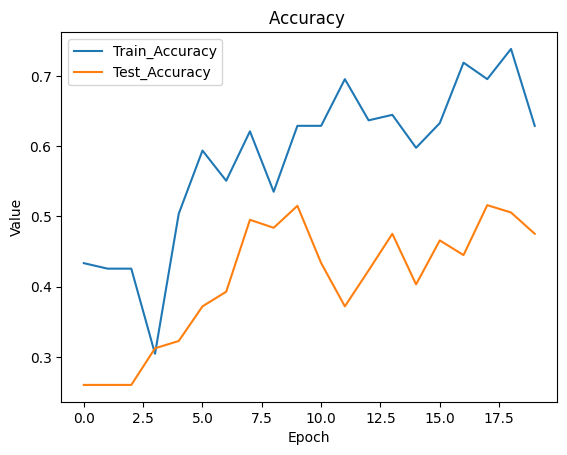

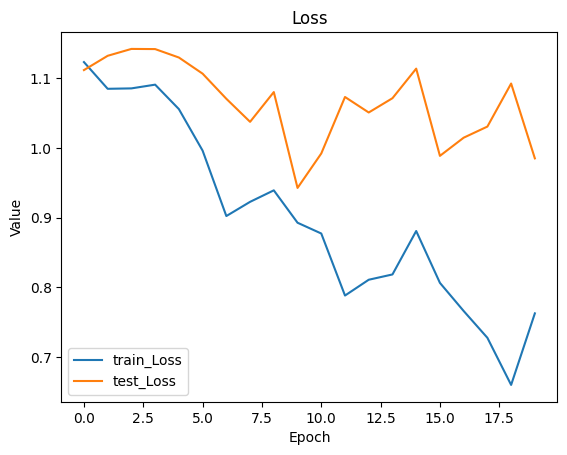

In [31]:
train_acc = model_0_results["Train_acc"]
test_acc = model_0_results["Test_acc"]

plt.plot(train_acc, label="Train_Accuracy")
plt.plot(test_acc, label="Test_Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Accuracy ")
plt.show()


test_loss = model_0_results["Test_loss"]
train_loss = model_0_results["Train_loss"]
plt.plot(train_loss, label="train_Loss")

plt.plot(test_loss, label="test_Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Loss")
plt.show()


In [49]:
import torch.nn.init as init

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_shape: int, output_shape: int,dropout_prob: float = 0.5):
        super().__init__()

        self.Conv2D = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_shape, kernel_size=3, stride=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(3),
            nn.Dropout(p=dropout_prob),

            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, kernel_size=3, stride=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(3),
            nn.Dropout(p=dropout_prob),
        )

        # Calculate the size of the flattened output after Conv2D layers
        flattened_size = hidden_shape * 25

        self.Classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=flattened_size, out_features=output_shape),
            nn.Dropout(p=dropout_prob),
        )
    def forward(self, x):
        return self.Classifier(self.Conv2D(x))




In [50]:
model_1 = TinyVGG(input_shape=3,
                  hidden_shape = 96,
                  output_shape=len(class_names),
                  dropout_prob= 0.5)
summary(model_1, input_size = [32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 96, 5, 5]            --
│    └─Conv2d: 2-1                       [32, 96, 62, 62]          2,688
│    └─ReLU: 2-2                         [32, 96, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 96, 60, 60]          83,040
│    └─ReLU: 2-4                         [32, 96, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 96, 20, 20]          --
│    └─Dropout: 2-6                      [32, 96, 20, 20]          --
│    └─Conv2d: 2-7                       [32, 96, 18, 18]          83,040
│    └─ReLU: 2-8                         [32, 96, 18, 18]          --
│    └─Conv2d: 2-9                       [32, 96, 16, 16]          83,040
│    └─ReLU: 2-10                        [32, 96, 16, 16]          --
│    └─MaxPool2d: 2-11                   [32, 96, 5, 5]            --


In [51]:
torch.manual_seed(42)
train_data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(32),
    transforms.ToTensor()
])
test_data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [52]:
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = train_data_transform)
test_data = datasets.ImageFolder(root = test_dir,
                                  transform = test_data_transform)

In [53]:
train_Dataloader = DataLoader(dataset = train_data,
                              batch_size = 32,
                              shuffle = True)
test_Dataloader = DataLoader(dataset = test_data,
                              batch_size = 32,
                              shuffle = False)

In [67]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01 )

model_1_results = train(model_1,
                        train_dataloader = train_Dataloader,
                        test_dataloader = test_Dataloader,
                        loss_fn = loss_fn,
                        optimizer = optimizer,
                        epochs = 5
                        )


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.0823206529021263 | Train_acc: 0.4453125 | Test_loss: 1.1112459103266399 | Test_acc: 0.2604166666666667
Epoch: 1 | Train_loss: 1.0850993990898132 | Train_acc: 0.45703125 | Test_loss: 1.112808386484782 | Test_acc: 0.2604166666666667
Epoch: 2 | Train_loss: 1.0713973343372345 | Train_acc: 0.44140625 | Test_loss: 1.1186980406443279 | Test_acc: 0.2604166666666667
Epoch: 3 | Train_loss: 1.1187047362327576 | Train_acc: 0.32421875 | Test_loss: 1.1142903566360474 | Test_acc: 0.2604166666666667
Epoch: 4 | Train_loss: 1.0764740705490112 | Train_acc: 0.41796875 | Test_loss: 1.1175179878870647 | Test_acc: 0.2604166666666667


In [68]:
import pandas as pd
df1 = pd.DataFrame(model_0_results)
df2 = pd.DataFrame(model_1_results)
df2

,Train_loss,Train_acc,Test_loss,Test_acc
0,1.082321,0.445312,1.111246,0.260417
1,1.085099,0.457031,1.112808,0.260417
2,1.071397,0.441406,1.118698,0.260417
3,1.118705,0.324219,1.114290,0.260417
4,1.076474,0.417969,1.117518,0.260417


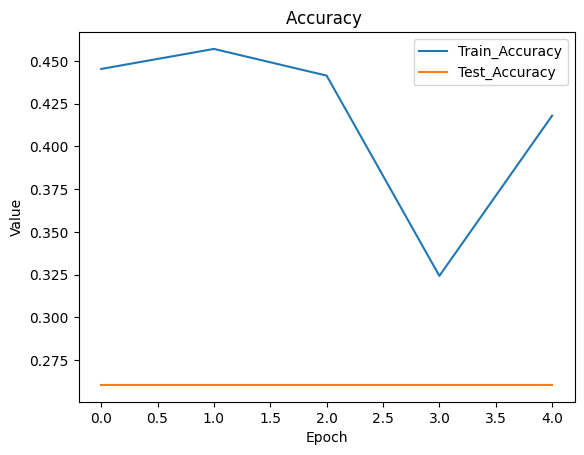

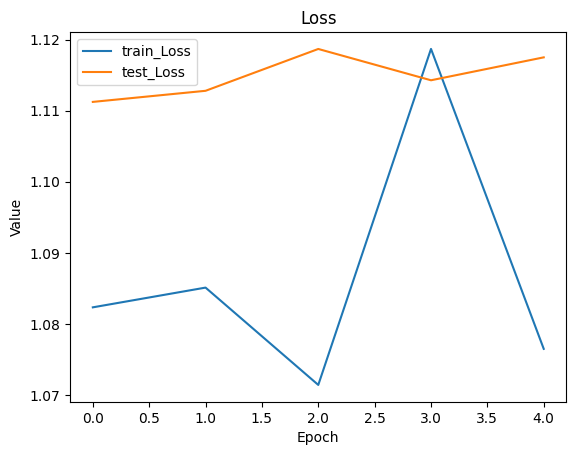

In [69]:
train_acc = model_1_results["Train_acc"]
test_acc = model_1_results["Test_acc"]

plt.plot(train_acc, label="Train_Accuracy")
plt.plot(test_acc, label="Test_Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Accuracy ")
plt.show()


test_loss = model_1_results["Test_loss"]
train_loss = model_1_results["Train_loss"]
plt.plot(train_loss, label="train_Loss")
plt.plot(test_loss, label="test_Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Loss")
plt.show()


In [70]:
import requests

custom_image_path = data_path/"04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print("downloading image ...")
    f.write(request.content)
else:
    print("already exist image...")

already exist image...


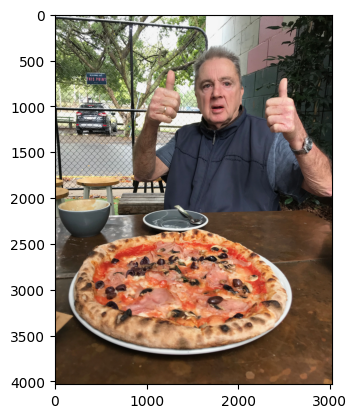

In [71]:
img= Image.open(custom_image_path)
plt.imshow(img)

In [72]:
import torchvision
img = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255.
transform = transforms.Compose([
    transforms.Resize(size = (64,64))
])
img = transform(img)
img

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[[0.4270, 0.9475, 0.9422,  ..., 0.1284, 0.0828, 0.0868],
         [0.4529, 0.4466, 0.5539,  ..., 0.0358, 0.1034, 0.1304],
         [0.3221, 0.2667, 0.2691,  ..., 0.0363, 0.0387, 0.0941],
         ...,
         [0.3794, 0.2809, 0.2549,  ..., 0.4544, 0.3235, 0.3853],
         [0.2843, 0.2603, 0.2529,  ..., 0.4681, 0.4196, 0.3539],
         [0.2534, 0.2814, 0.2863,  ..., 0.4397, 0.7020, 0.6319]],

        [[0.4784, 0.9647, 0.9461,  ..., 0.1598, 0.0946, 0.0985],
         [0.5118, 0.5250, 0.6000,  ..., 0.0510, 0.1152, 0.1578],
         [0.3574, 0.3059, 0.3108,  ..., 0.0480, 0.0466, 0.1069],
         ...,
         [0.2549, 0.1985, 0.1725,  ..., 0.3132, 0.1980, 0.2676],
         [0.1980, 0.1779, 0.1706,  ..., 0.3348, 0.3020, 0.2520],
         [0.1711, 0.1990, 0.1961,  ..., 0.3098, 0.4941, 0.4397]],

        [[0.5397, 0.9765, 0.9539,  ..., 0.1088, 0.0593, 0.0711],
         [0.3431, 0.3221, 0.5358,  ..., 0.0289, 0.0721, 0.1304],
         [0.2907, 0.2078, 0.1975,  ..., 0.0206, 0.0270, 0.

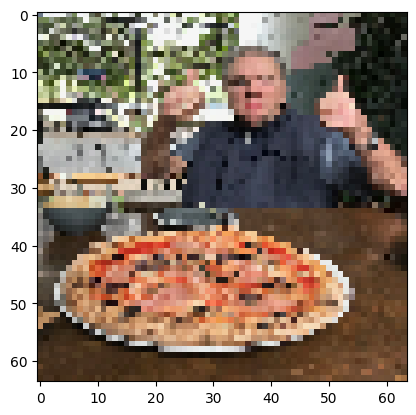

In [73]:
plt.imshow(img.permute(1,2,0))

CHECKING MODEL0 and MODEL1

In [74]:
model_0.eval()
with torch.inference_mode():
  logit = model_0(img.unsqueeze(0))
  target = torch.argmax(torch.softmax(logit, dim =1), dim =1)
  print(f"Logits: {logit} | Pred: {target}")
class_names[target]

Logits: tensor([[ 0.2231, -1.1791, -0.4763]]) | Pred: tensor([0])


'pizza'

In [75]:
model_1.eval()
with torch.inference_mode():
  logit = model_1(img.unsqueeze(0))
  target = torch.argmax(torch.softmax(logit, dim =1), dim =1)
  print(f"Logits: {logit} | Pred: {target}")
class_names[target]

Logits: tensor([[ 0.1674,  0.0102, -0.0102]]) | Pred: tensor([0])


'pizza'

TOGRIN CHIQDI PIZZA

In [76]:
from typing import List
def pred_image(model: torch.nn.Module,
              image_path: str,
              class_names: List[str] = None,
              transform=None):
  img = torchvision.io.read_image(str(image_path)).type(torch.float32)/255.
  model.eval()
  with torch.inference_mode():
    logit = model(img.unsqueeze(dim = 0))
    target_prob = torch.softmax(logit, dim = 1)
    target_label = torch.argmax(target_prob, dim = 1)

  plt.imshow(target_label.squeeze().permute(1,2,0))
  if class_names:
    title = f"Pred_label: {class_names[target_label ]}| Pred_prob: target_prob.max()"
  else:
    title = f"Pred: {target_label} | prob: {target_prob.max()}"
    plt.axis(False)
    plt.title(title)


In [77]:
# pred_image fuksiya ishlamayapti

In [78]:
!pred_image(model= model_0,
           image_path = custom_image_path,
           transform = transform)

IndentationError: unexpected indent (<ipython-input-78-be82617dc47e>, line 2)